In [ ]:
%matplotlib inline
%timeit

# Conceptual Problems

## 1. Validation of Time-Series Anomaly Detection using ML models:

The described scenario is a common challenge in machine learning and data science, particularly in high-stakes industrial settings. As an interesting side note, I currently work on this anomaly detection problem with binary classification as a data scientist in one of the ventures of a federal lab (PNNL). There are several reasons why the trained model may need to perform better on new data despite showing promising results in 10-fold cross-validation. Here is a detailed breakdown:

### **Possible Reasons for Poor Performance**

1. **Overfitting Data**: The model could have memorized the training data too well, failing to generalize to new, unseen data. It might be too complex, and has learned the noise too well in the training data.
2. **Data Distribution Shift**: The training and testing data may have different distributions, so the model must be better generalized. This shift is typical in dynamic environments where the statistical properties of the variables might change over time.
3. **Concept Drift (Methodology selection)**: The behavior of the industrial equipment might change over time. A model trained on past data might not capture this dynamic nature. Additionally, there might be better strategies than vanilla 10-fold cross-validation for time-series sensor data.
4. **Feature (Importance) Engineering**: The features used may need to be more informative or less noisy. Some of the 800 sensor readings may be irrelevant for predicting anomalies or may require transformation to become useful.
5. **Label Quality (Imbalance)**: If the labeled anomalies are incorrect or incomplete, the model will learn from these mistakes. Furthermore, anomalies are often rare events, and if the model is trained on an imbalanced dataset, it might not generalize well.
6. **Evaluation Metric**: Accuracy may not be the best metric for an anomaly detection problem, especially if the anomalies are rare. More suitable metrics might be precision, recall, or F1-score.
7. **Hyperparameter Tuning**: If the hyperparameters were tuned only based on the cross-validation error, it might lead to over-optimistic results.

### **Strategy for Model Training, Tuning, and Validation**

#### * **Data Preprocessing**

1. **Data Cleansing**: Handle missing values (e.g., imputation or removing instances with missing data) and preprocess anomalous samples appropriately, as they could disproportionately affect anomaly detection. Cleaning the data to ensure the model learns from accurate information is crucial.
2. **Feature Selection / Feature Engineering**: Use domain knowledge and statistical tests to identify which sensor readings are most likely informative. Conversely, feature engineering can reduce the dimensionality or create even more relevant features. Feature engineering techniques like PCA or LASSO reduce dimensionality to reduce overfitting and computational time.
3. **Processing Temporal Features**: Since the readings are hourly, consider adding time-based features (e.g., day of the week, time of day). Processing features with rolling averages or sliding window techniques as additional ones can benefit the model with more comprehensive temporal relationships between features.
4. **Class Balancing**: Use techniques like SMOTE or random oversampling to balance the classes.

#### * **Model Selection and Benchmarking**

1. **Baseline Model**: Start with a simple model (like Logistic Regression) to set a baseline performance. It is easy to interpret and serves as a baseline comparison for benchmarking the performances of future models.
2. **Advanced Models**: If necessary, move to more complex models like Random Forests, XGBoost, or Convolutional Neural Networks (CNNs).
3. **Anomaly Detection Algorithms**: Consider specialized anomaly detection algorithms like Isolation Forest, Local Outlier Factor (LOF), or One-Class SVM. More complex models can capture non-linearities and temporal patterns.
4. **Ensemble Methods**: Given the high-dimensional data, ensemble methods like a combination of Self-Organizing Maps (SOMs) or KMeans Clustering (both unsupervised learning) with a supervised learning technique like a K-Nearest Neighbors (KNN) classifier could be beneficial.

#### * **Training and Validation**

1. **Regularization**: Apply regularization techniques to prevent overfitting.
2. **Batch (Time-Based) Split**: Instead of random 10-fold cross-validation, use time-based splitting to make the validation set more reflective of future, unseen data.
3. **Time Series Cross-Validation**: Use methods specifically designed for time-series data. Regular k-fold CV can leak future info into the training set if data has temporal patterns.
4. **Stratification**: Ensure each fold has a similar distribution of anomalies and regular readings. Guarantees that each fold is representative of the class proportions.

#### * **Evaluation Metrics**

1. **Multi-Metric Evaluation**: Use a combination of metrics like F1-score, precision, and recall to get a more balanced view of the model's performance. Include the Receiving Operating Characteristic (ROC) curve or the Precision-Recall curve.
2. **Area under the Metrics' Curves**: In an imbalanced setting, the area under the Precision-Recall curve (AUC-PR, or AUC for short) or the ROC curve (AUC ROC) is often a better metric than accuracy.
3. **Cost-Benefit Analysis**: Given that this is industrial equipment, the cost of False Positives and False Negatives could be very different.
4. **Custom Evaluation Metrics**: Consider developing custom evaluation metrics that capture misclassifications' business/operational impact.

#### * **Hyperparameter Tuning**

1. **Grid Search / Random Search**: Start with Grid Search and move to Random Search if the parameter space is enormous. Exhaustive but effective for fewer hyperparameters.
2. **Early Stopping**: To prevent overfitting during the training, use a separate validation set or nested cross-validation to fine-tune hyperparameters.
3. **Advanced Tuning Techniques**: Consider using more advanced tuning techniques like Bayesian Optimization or Genetic Algorithms for a more efficient search in the hyperparameter space. Usually more efficient than grid search for multiple hyperparameters of complex models like XGBoost.
4. **Nested Cross-Validation**: Use nested cross-validation for hyperparameter tuning better to estimate the model's performance on unseen data.

#### * **Post-Deployment**

1. **Continuous Monitoring and Retraining**: Establish a system for continuously monitoring the model's performance and retraining it with new data to adapt to any changes in the data distribution.
2. **Feedback Loop**: Establish a mechanism for experts to correct the model's predictions, providing a richer set of labeled examples for future training.
3. **Adaptive Learning**: If feasible, implement an online learning algorithm that adapts to new data as it comes in real time.
4. **Explainability**: Use model explainability tools to understand why the model makes specific predictions, which can also help in feature engineering.

#### * **Documentation and Interpretability**


1. **Model Interpretation Tools**: Use tools like SHAP or LIME to understand the model's predictions, which can also provide insights for further improvement.

### **Exhaustive Justifications**

#### **Temporal Features and Time-Based Split**:

* It is crucial to account for temporal patterns and dependencies (if timed data).
  * Sensors' readings are often autocorrelated in time so that random splits can leak future information into the past.
  * Reducing dimensionality or increasing the number of features and their correlated ones can make the model more straightforward and interpretable.

#### **Advanced Models and Specialized Algorithms**:

* These are better at capturing complex relationships in the data.
  * The model often needs to see enough anomalies during training to recognize them in the future (class balancing).

#### **Stratification**:

* Anomalies are usually rare events, and stratification ensures the model learns to recognize them.

#### **Multiple Metrics**:

* A single metric like accuracy is often incomplete info in imbalanced or cost-sensitive situations like anomaly detection.
  * Precision-Recall over accuracy in imbalanced settings since accuracy can be misleading.
  * SHAP values help understand the contribution each class has to each feature and rank the features in importance of contribution.

## 2. Model Generalizability:
Out-Of-Distribution Training &amp; Testing  (Domain Shift)

The discrepancy between the training and test datasets, often termed a "domain shift," can significantly impact the performance of predictive models. Here is a detailed outline of various approaches the research team could consider:

### **Data Preprocessing**

#### **Feature Engineering**

* Methods:
  * Leverage transformation methods like min-max scaling, z-score normalization, and PCA.
  * Design polynomial features to capture non-linear relationships.
  * Entertain encoding categorical variables appropriately (e.g., one-hot encoding).
* Justification:
  * Standardizing the scale and distribution of features can make the model less susceptible to domain-specific peculiarities.
* Specific Use:
  * Transforming features like ethnicity or environmental variables to a standard scale could make the model more robust to the demographic and environmental differences between the American and European datasets.

#### **Data Augmentation**

* Methods:
  * SMOTE (Synthetic Minority Over-sampling Technique) for imbalanced classes.
  * Consider bootstrapping to create synthetic samples.
* Justification:
  * Augmenting the data can make the model more robust to unseen or rare conditions in the European dataset.
* Specific Use:
  * Using methods like SMOTE could help account for underrepresented autistic conditions in the American dataset that might be more prevalent in the European dataset.

### **Model Selection &amp; Modification**

#### **Invariant Feature Selection**

* Methods:
  * Mutual Information Score
  * Feature Importance from Tree-based models
* Justification:
  * Features that are stable across both datasets will likely make the model more generalizable.
* Specific Use:
  * By focusing on invariant features across both datasets, such as specific genetic markers, the team could build a less sensitive model to the geographic and demographic differences between the datasets.

#### **Domain-Adaptive Models**

* Methods:
  * Domain-Adversarial Training
  * Maximum Mean Discrepancy (MMD)
* Justification:
  * These models minimize the distributional difference between the source and target domains, improving generalizability.
* Specific Use:
  * Domain-adversarial training could help the model learn to ignore features causing the domain shift, thereby improving its performance on the European dataset.

### **Model Training**

#### **Stratified Sampling**

* Methods:
  * Divide the American dataset into strata based on key features and samples from each stratum.
* Justification:
  * This ensures that minority groups within the dataset are adequately represented, making the model more generalizable.
* Specific Use:
  * This method could ensure that the American dataset is not over-representative of certain ethnic or demographic groups, making the model more generalizable to the diverse European dataset.

#### **Transfer Learning**

* Methods:
  * Pre-train the model on the American data and fine-tune it on a subset of European data.
* Justification:
  * Features learned from the American dataset could be relevant to the European dataset, and fine-tuning allows the model to adapt to the new domain.
* Specific Use:
  * By pre-training the American dataset and fine-tuning on European data, the model would learn the general autistic conditions from the American data while adapting to the specific conditions more prevalent in the European dataset.

### **Model Evaluation**

#### **Cross-Validation on Source Data**

* Methods:
  * k-fold or stratified k-fold cross-validation
* Justification:
  * Ensures the model is robust and generalizable within the same domain.
* Specific Use:
  * Cross-validation ensures that the model's performance is robust across different sub-samples of the American dataset, which is an excellent preliminary check before testing it on a completely different dataset.

#### **Calibration**

* Methods:
  * Platt scaling
  * Isotonic regression
* Justification:
  * Properly calibrated probabilities can improve the reliability of the model's predictions, especially when facing domain shift.
* Specific Use:
  * Since the European dataset is different, the model's output probabilities might not be reliable. Calibration methods like Platt scaling can correct this, providing more reliable probability estimates.

#### **Sensitivity Analysis**

* Methods:
  * Perturbation analysis
  * Partial dependence plots
* Justification:
  * Understanding how different features affect the model's output can provide insights into its behavior across domains.
* Specific Use:
  * This examination can provide insights into which features are most impactful in the predictive model, allowing the team to understand how the model might react to the European-specific features.

### **Post-Evaluation**

#### **Error Analysis**

* Methods:
  * Confusion Matrix
  * ROC and PR curves
* Justification:
  * This helps identify the model's weaknesses, such as whether it is more prone to false positives or false negatives.
* Specific Use:
  * Understanding the type of errors can help the team make targeted improvements, such as focusing on reducing false negatives if the model is missing too many actual cases of autism.

#### **Confidence Intervals**

* Methods:
  * Bootstrapping
  * Analytical methods for estimating intervals
* Justification:
  * Provides a measure of uncertainty around performance metrics, which is crucial given the domain shift.
* Specific Use:
  * Given the domain shift, having confidence intervals around performance metrics can provide a more nuanced understanding of how well the model is likely to perform on the European dataset.

### **Future Steps**

#### **Iterative Refinement**

* Methods:
  * Use feedback loops for continuous model updating.
* Justification:
  * Models are never perfect; they can continually be updated based on new data or insights.
* Specific Use:
  * As more data or feedback becomes available, the model can be continuously updated, adapting it to changing conditions or discoveries in autism research.

#### **Expert Review**

* Methods:
  * Involve domain experts in reviewing the model's predictions and feature importances.
* Justification:
  * Expertise in autism research can help refine the model and validate its findings, which may not be apparent from the data alone.
* Specific Use:
  * Autism experts can provide insights into whether the model's predictions make clinical sense and can suggest improvements or point out biases.

# Applied Problems

## 1. Cross-Validation &amp; Interpretation

### Importing Libraries

In [ ]:
import math
import time

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, make_scorer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [ ]:
from keras.datasets import mnist

### Initializing Functions

#### K-Fold Cross Validation Function

In [ ]:
def k_fold_cv(X, y, model, K=5):
    n_samples = len(y)
    fold_size = n_samples // K
    indices = np.arange(n_samples)
    np.random.shuffle(indices)

    fold_errors = []
    for k in range(K):
        val_indices = indices[k * fold_size:(k + 1) * fold_size]
        train_indices = np.setdiff1d(indices, val_indices)

        X_train, X_val = X[train_indices], X[val_indices]
        y_train, y_val = y[train_indices], y[val_indices]

        model.fit(X_train, y_train)
        y_val_pred_prob = model.predict_proba(X_val)[:, 1]
        error = log_loss(y_val, y_val_pred_prob)
        fold_errors.append(error)

    return np.mean(fold_errors)

#### Hyperparameter Tuning Function

In [ ]:
# Logistic Regression & Linear Support Vector Machine Implementation
def hyperparameter_tuning(X, y):
    # range & dict of regularization strengths
    r_strength_values = np.logspace(-3, 3, 7)
    # param_grid = {'C': r_strength_values}

    best_svm_error, best_svm_C = float('inf'), None
    best_logreg_error, best_logreg_C = float('inf'), None

    manual_svm_errors, train_svm_errors, test_svm_errors = [], [], []
    manual_logreg_errors, train_logreg_errors, test_logreg_errors = [], [], []

    scoring = make_scorer(log_loss, greater_is_better=False, needs_proba=True)

    for C in r_strength_values:
        print(f"Using regularization strength: {C}")
        svc_model = SVC(kernel='linear', C=C, probability=True)
        logreg_model = LogisticRegression(solver='saga', penalty='l1', C=C, max_iter=10000)

        svm_error = k_fold_cv(X, y, svc_model)
        logreg_error = k_fold_cv(X, y, logreg_model)

        if logreg_error < best_logreg_error:
            best_logreg_error, best_logreg_C = logreg_error, C

        if svm_error < best_svm_error:
            best_svm_error, best_svm_C = svm_error, C

        manual_logreg_errors.append(logreg_error)
        manual_svm_errors.append(svm_error)

        svc_model.fit(X_train, y_train)
        svm_train_error = log_loss(y_train, svc_model.predict_proba(X_train)[:, 1])
        svm_test_error = log_loss(y_test, svc_model.predict_proba(X_test)[:, 1])
        train_svm_errors.append(svm_train_error)
        test_svm_errors.append(svm_test_error)

        logreg_model.fit(X_train, y_train)
        logreg_train_error = log_loss(y_train, logreg_model.predict_proba(X_train)[:, 1])
        logreg_test_error = log_loss(y_test, logreg_model.predict_proba(X_test)[:, 1])
        train_logreg_errors.append(logreg_train_error)
        test_logreg_errors.append(logreg_test_error)

    # Built-in Tuning
    svm_grid_search = GridSearchCV(SVC(kernel='linear', probability=True),
                               {'C': r_strength_values}, scoring=scoring, cv=5)
    svm_grid_search.fit(X_train, y_train)
    print(f'Best SVM hyperparameter with GridSearchCV: {svm_grid_search.best_params_}')

    logreg_grid_search = GridSearchCV(LogisticRegression(solver='saga', penalty='l1', max_iter=10000),
                               {'C': r_strength_values}, scoring=scoring, cv=5)
    logreg_grid_search.fit(X_train, y_train)
    print(f'Best LogReg hyperparameter with GridSearchCV: {logreg_grid_search.best_params_}')

    svm_rand_search = RandomizedSearchCV(SVC(kernel='linear', probability=True),
                                     {'C': r_strength_values}, scoring=scoring, cv=5, n_iter=7)
    svm_rand_search.fit(X_train, y_train)
    print(f'Best SVM hyperparameter with RandomizedSearchCV: {svm_rand_search.best_params_}')

    logreg_rand_search = RandomizedSearchCV(LogisticRegression(solver='saga', penalty='l1', max_iter=10000),
                                     {'C': r_strength_values}, scoring=scoring, cv=5, n_iter=7)
    logreg_rand_search.fit(X_train, y_train)
    print(f'Best LogReg hyperparameter with RandomizedSearchCV: {logreg_rand_search.best_params_}')

    print(f'Best manual hyperparameter for Logistic Regression: {best_logreg_C}')
    print(f'Best manual hyperparameter for Linear SVM: {best_svm_C}')

    # Visualizing errors for Logistic Regression and Linear SVM
    plt.figure(figsize=(10, 6))
    plt.plot(r_strength_values, train_logreg_errors, color='red', marker='o', label='Logistic Regression Training Error')
    plt.plot(r_strength_values, test_logreg_errors, color='black', marker='o', label='Logistic Regression Test Error')
    plt.plot(r_strength_values, manual_logreg_errors, color='blue', marker='o', label='Logistic Regression CV Error')
    plt.plot(r_strength_values, train_svm_errors, color='magenta', marker='*', label='Linear SVM Training Error')
    plt.plot(r_strength_values, test_svm_errors, color='gray', marker='*', label='Linear SVM Test Error')
    plt.plot(r_strength_values, manual_svm_errors, color='cyan', marker='*', label='Linear SVM CV Error')
    plt.xscale('log')
    plt.xlabel('Regularization Strength (C)')
    plt.ylabel('Error')
    plt.title('Hyperparameter Tuning')
    plt.legend()
    plt.grid(True)
    plt.show()

    return best_logreg_C, best_svm_C

#### Misclassified Samples Visualizing Function

In [ ]:
def visualize_misclassified_indices(X, y, indices, model_name, model, mutual=False):
    # Limit to first 100 indices
    num_indices = len(indices)
    if num_indices > 100:
        indices = indices[:100]
        num_indices = 100

    # Determine grid dimensions
    cols = int(np.ceil(np.sqrt(num_indices)))
    rows = int(np.ceil(num_indices / cols))

    fig, axs = plt.subplots(rows, cols, figsize=(10, 10), squeeze=False)
    # Ensure axs is always a 2D array
    axs = np.atleast_2d(axs)

    for i, index in enumerate(indices):
        row = i // cols
        col = i % cols

        # Handle 1-row case
        ax = axs[row, col]
        ax1 = axs[row, col] if rows > 1 else axs[col]
        print(type(ax), type(ax1), type(axs))

        ax.imshow(X[index].reshape(int(math.sqrt(len(X[index]))), int(math.sqrt(len(X[index])))), cmap='gray')

        if mutual:
            ax.set_title(f'Mutually Misclassified True label: {np.where(y == 1, 3, 8)[index]} #{index+1}\n\
            LogReg Pred: {np.where(best_log_reg_model.predict(X[index].reshape(1, -1))[0] == 1, 3, 8)}\n\
            SVM Pred: {np.where(best_svm_model.predict(X[index].reshape(1, -1))[0] == 1, 3, 8)}')
        else:
            ax.set_title(f'True label: {np.where(y == 1, 3, 8)[index]} #{index+1}, {model_name} Pred: {np.where(model.predict(X[index].reshape(1, -1))[0] == 1, 3, 8)}')

        # Hide axes ticks and labels
        ax.axis('off')

    # Hide any empty subplots (if n_indices is not a multiple of cols)
    for i in range(num_indices, rows * cols):
        fig.delaxes(axs.flatten()[i])

    plt.tight_layout()
    plt.show()

### MNIST Data Wrangling

#### Load MNIST Dataset

In [ ]:
(X, y), _ = mnist.load_data()

#### Filter for Digits 3 &amp; 8

In [ ]:
# filter = np.where((y == 3) | (y == 8))
X, y = X[np.where((y == 3) | (y == 8))], y[np.where((y == 3) | (y == 8))]

# train_filter = np.where((y_train == 3) | (y_train == 8))
# X_train, y_train = X_train[train_filter], y_train[train_filter]

# test_filter = np.where((y_test == 3) | (y_test == 8))
# X_test, y_test = X_test[test_filter], y_test[test_filter]

# X_train, y_train = X_train[(y_train == 3) | (y_train == 8)], y_train[(y_train == 3) | (y_train == 8)]
# X_test, y_test = X_test[(y_test == 3) | (y_test == 8)], y_test[(y_test == 3) | (y_test == 8)]

#### Convert labels to binary: 1 for 3 and 0 for 8



In [ ]:
y = np.where(y == 3, 1, 0)

#### Reduce sample size

In [ ]:
# X, _, y, _ = train_test_split(X, y, test_size=0.5, random_state=42, stratify=y)
X = X[:1250]
y = y[:1250]

#### Flatten the images

In [ ]:
X = X.reshape(-1, 28*28)

#### Standardize the data

In [ ]:
scaler = StandardScaler()

X = scaler.fit_transform(X.astype(np.float64))

#### Split the data into training and testing sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
import time
start_time = time.perf_counter()
print("hel")
time.perf_counter() - start_time

7.157699999993383e-05

### Hyperparameter Tuning Stage

Using regularization strength: 0.001
Using regularization strength: 0.01
Using regularization strength: 0.1
Using regularization strength: 1.0
Using regularization strength: 10.0
Using regularization strength: 100.0
Using regularization strength: 1000.0
Best SVM hyperparameter with GridSearchCV: {'C': 0.001}
Best LogReg hyperparameter with GridSearchCV: {'C': 1.0}
Best SVM hyperparameter with RandomizedSearchCV: {'C': 0.001}
Best LogReg hyperparameter with RandomizedSearchCV: {'C': 1.0}
Best manual hyperparameter for Logistic Regression: 1.0
Best manual hyperparameter for Linear SVM: 0.001


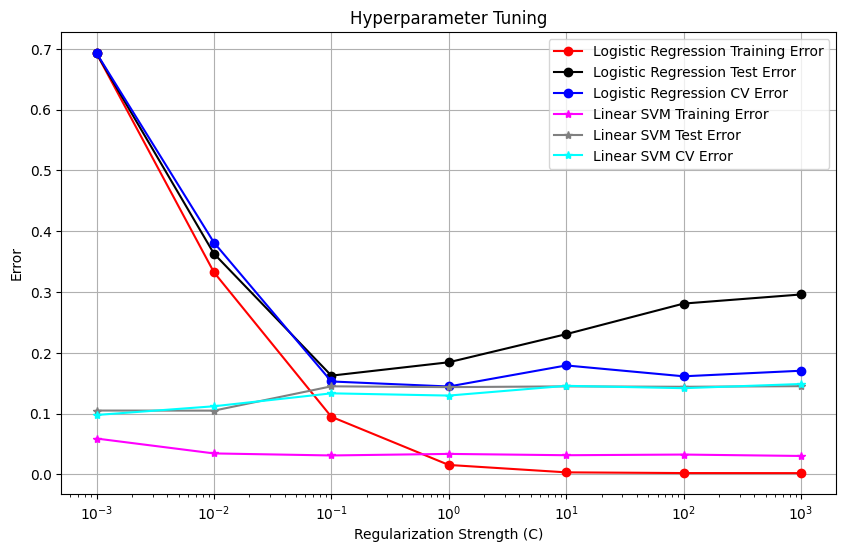

2980.291554636002

In [ ]:
start_time = time.perf_counter()

best_C_log_reg, best_C_svm = hyperparameter_tuning(X_train, y_train)

time.perf_counter() - start_time

### Optimal Regularization Strengths (`best_C_log_reg` &amp; `best_C_svm`) Used in Training Models

#### For Support Vector Machine (SVM):

In [ ]:
best_svm_model = SVC(kernel='linear', C=best_C_svm, probability=True).fit(X_train, y_train)

#### For Logistic Regression (LogReg):

In [ ]:
best_log_reg_model = LogisticRegression(solver='saga', penalty='l1', C=best_C_log_reg, max_iter=10000).fit(X_train, y_train)

### Identifying Important Features

#### For Support Vector Machine (SVM):

In [ ]:
svm_coefs = best_svm_model.coef_.reshape(28, 28)

#### For Logistic Regression (LogReg):

In [ ]:
log_reg_coefs = best_log_reg_model.coef_.reshape(28, 28)

#### Visualization:
Brighter colors indicate higher coefficient values, suggesting these pixels are more influential in classifying a digit as 3 or 8.

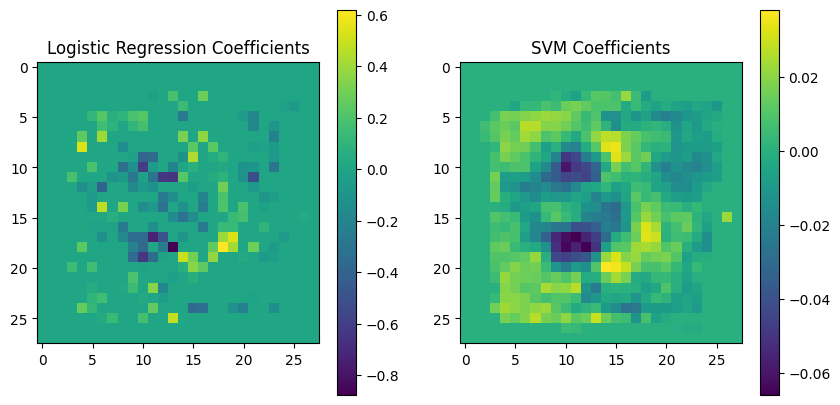

In [ ]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(log_reg_coefs, cmap='viridis')
plt.title('Logistic Regression Coefficients')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(svm_coefs, cmap='viridis')
plt.title('SVM Coefficients')
plt.colorbar()

plt.show()

### Predictions

#### For Support Vector Machine (SVM):

In [ ]:
svm_preds = best_svm_model.predict(X_test)

#### For Logistic Regression (LogReg):

In [ ]:
log_reg_preds = best_log_reg_model.predict(X_test)

### Misclassifications

#### Separate Misclassifications

##### For Support Vector Machine (SVM):

In [ ]:
svm_misclassified_indices = np.where(svm_preds != y_test)[0]

##### For Logistic Regression (LogReg):

In [ ]:
log_reg_misclassified_indices = np.where(log_reg_preds != y_test)[0]

#### Mutual &amp; Unique Misclassifications

In [ ]:
mutual_misclassified_indices = np.intersect1d(log_reg_misclassified_indices, svm_misclassified_indices)

svm_unique_misclassified_indices = np.setdiff1d(svm_misclassified_indices, mutual_misclassified_indices)

log_reg_unique_misclassified_indices = np.setdiff1d(log_reg_misclassified_indices, mutual_misclassified_indices)

#### Visualize some misclassified images

##### Visualizing Mutual Misclassifications

<class 'matplotlib.axes._axes.Axes'> <class 'matplotlib.axes._axes.Axes'> <class 'numpy.ndarray'>
<class 'matplotlib.axes._axes.Axes'> <class 'matplotlib.axes._axes.Axes'> <class 'numpy.ndarray'>
<class 'matplotlib.axes._axes.Axes'> <class 'matplotlib.axes._axes.Axes'> <class 'numpy.ndarray'>
<class 'matplotlib.axes._axes.Axes'> <class 'matplotlib.axes._axes.Axes'> <class 'numpy.ndarray'>


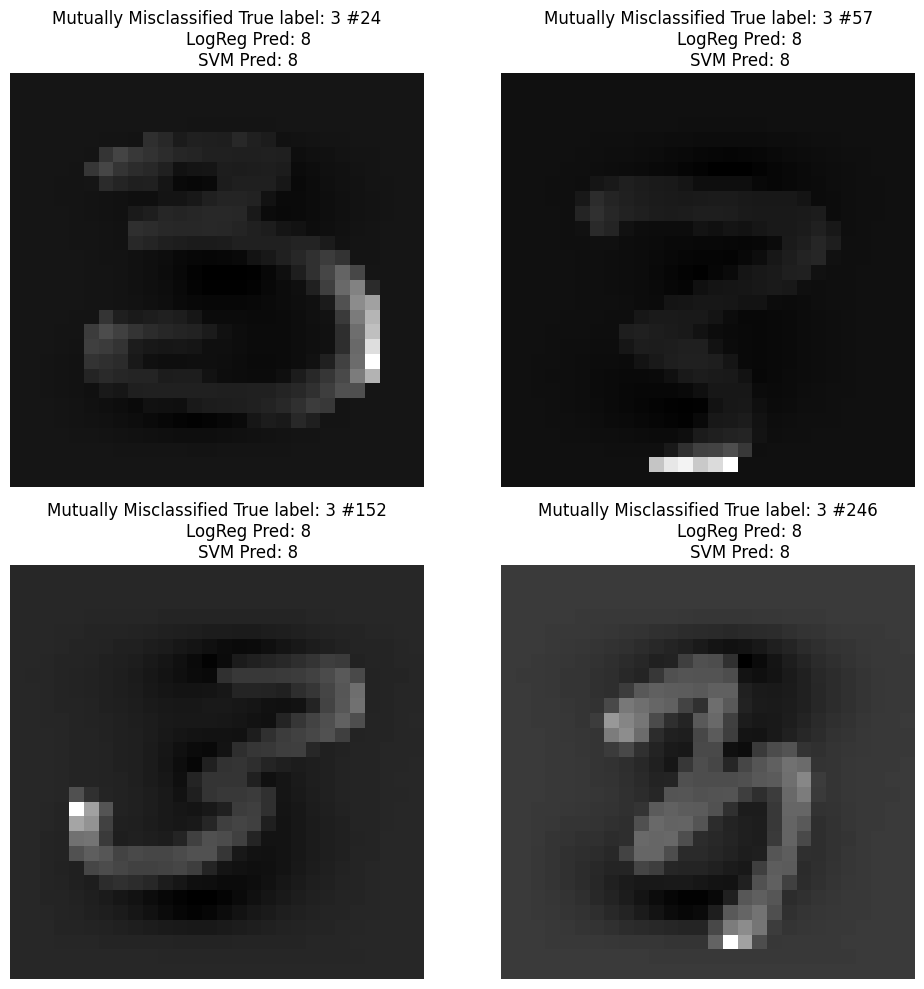

In [ ]:
visualize_misclassified_indices(X_test, y_test, mutual_misclassified_indices, 'Mutual', None, mutual=True)

##### Visualizing SVM Unique Misclassifications

In [ ]:
if svm_unique_misclassified_indices >= 1:
  visualize_misclassified_indices(X_test, y_test, svm_unique_misclassified_indices, 'SVM', best_svm_model)

<ipython-input-28-f7047f1f0197>:1: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if svm_unique_misclassified_indices >= 1:


##### Visualizing Logistic Regression Unique Misclassifications

<class 'matplotlib.axes._axes.Axes'> <class 'matplotlib.axes._axes.Axes'> <class 'numpy.ndarray'>
<class 'matplotlib.axes._axes.Axes'> <class 'matplotlib.axes._axes.Axes'> <class 'numpy.ndarray'>
<class 'matplotlib.axes._axes.Axes'> <class 'matplotlib.axes._axes.Axes'> <class 'numpy.ndarray'>
<class 'matplotlib.axes._axes.Axes'> <class 'matplotlib.axes._axes.Axes'> <class 'numpy.ndarray'>
<class 'matplotlib.axes._axes.Axes'> <class 'matplotlib.axes._axes.Axes'> <class 'numpy.ndarray'>
<class 'matplotlib.axes._axes.Axes'> <class 'matplotlib.axes._axes.Axes'> <class 'numpy.ndarray'>
<class 'matplotlib.axes._axes.Axes'> <class 'matplotlib.axes._axes.Axes'> <class 'numpy.ndarray'>


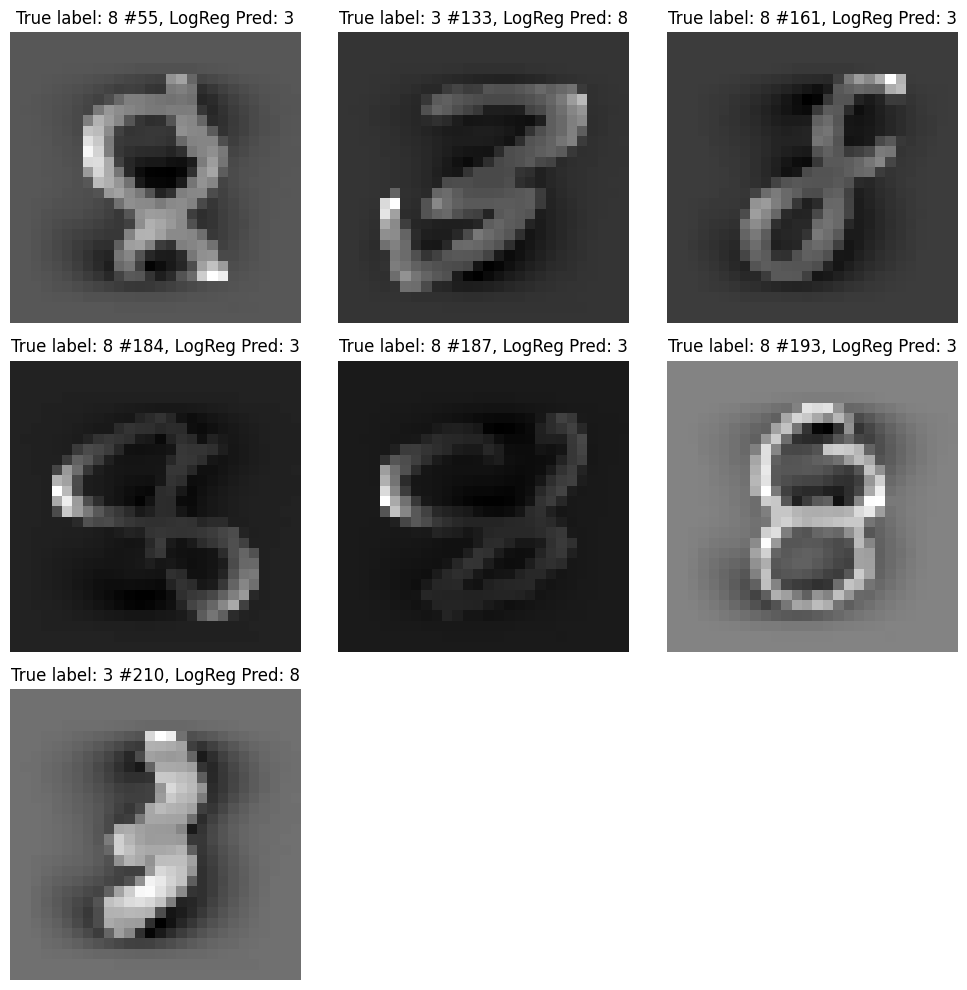

In [ ]:
visualize_misclassified_indices(X_test, y_test, log_reg_unique_misclassified_indices, 'LogReg', best_log_reg_model)

### Discussion:

1. Model Performance:

  * The plot of error curves against the regularization strength provides a more nuanced understanding of how the model performs across the training, validation, and test datasets.
    * Allows for the visualization of overfitting or underfitting tendencies, as seen from the convergence or divergence of training and test error curves.

2. Hyperparameter Selection:
  * The comparison between manual hyperparameter tuning and built-in methods like GridSearchCV and RandomizedSearchCV highlights the efficiency and effectiveness of different tuning approaches.
  * It’s crucial to note the hyperparameters selected by each method and how they compare in terms of resulting model performance on unseen data (test set).

3. Model Generalization (Robustness):
  * The training-test split ensures a more realistic evaluation of the model's generalization capability.
  * It's insightful to see how the model, trained and validated on one portion of the data, performs on an entirely separate set of data, thus providing a better measure of its predictive accuracy and robustness.

4. Misclassification Analysis:
  * With a training-test split, the misclassification analysis on the test set gives a clearer picture of the instances where the model struggles with unseen data.
    * This, in turn, sheds light on potential areas of improvement for the model.

5. Built-in Methods Validation:
  * Utilizing built-in methods like GridSearchCV and RandomizedSearchCV not only provides a benchmark for the manual hyperparameter tuning process but also validates the choice of hyperparameters, ensuring that the selected models are indeed optimized for performance.

6. Cross-validation Reliability:
  * Observing how the cross-validation error trends with the training and test errors across different hyperparameter values reinforces the reliability of cross-validation as a technique for hyperparameter tuning and model validation.

7. Feature Importance:
  * The understanding of feature importance remains consistent; however, with a more rigorous evaluation setup, the confidence in the identified important features and their role in the model's decision-making process is bolstered.

## 2. Multi-Class Classification

### Importing Libraries

In [ ]:
import numpy as np
import seaborn as sns

In [ ]:
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

### Define Models &amp; Respective Hyperparameters

In [ ]:
models = {
    "Logistic Regression": {
        "model": LogisticRegression(multi_class='multinomial', solver='saga', max_iter=10000),
        "params": {"C": np.logspace(-3, 3, 7)}
    },
    "Naive Bayes": {
        "model": GaussianNB(),
        "params": {}  # No hyperparameters to tune for Naive Bayes
    },
    "Linear Discriminant Analysis": {
        "model": LinearDiscriminantAnalysis(),
        "params": {"solver": ["svd", "lsqr", "eigen"]}
    },
    "Linear SVM": {
        "model": SVC(kernel='linear', decision_function_shape='ovr'),
        "params": {"C": np.logspace(-3, 3, 7)}
    },
    "RBF Kernel SVM": {
        "model": SVC(kernel='rbf', decision_function_shape='ovr'),
        "params": {"C": np.logspace(-3, 3, 7), "gamma": np.logspace(-3, 3, 7)}
    },
    "Poly Kernel SVM": {
        "model": SVC(kernel='poly', decision_function_shape='ovr'),
        "params": {"C": np.logspace(-3, 3, 7), "degree": [2, 3, 4]}
    }
}

### sklearn's MNIST Data Wrangling

#### Load MNIST Dataset

In [ ]:
digits = datasets.load_digits()

X, y = digits.data, digits.target

#### Split the data into training and testing sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#### Standardize the data

In [ ]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Train, Tune, and Evaluate Each Model

Processing Logistic Regression model...
Logistic Regression Test Accuracy: 0.9694


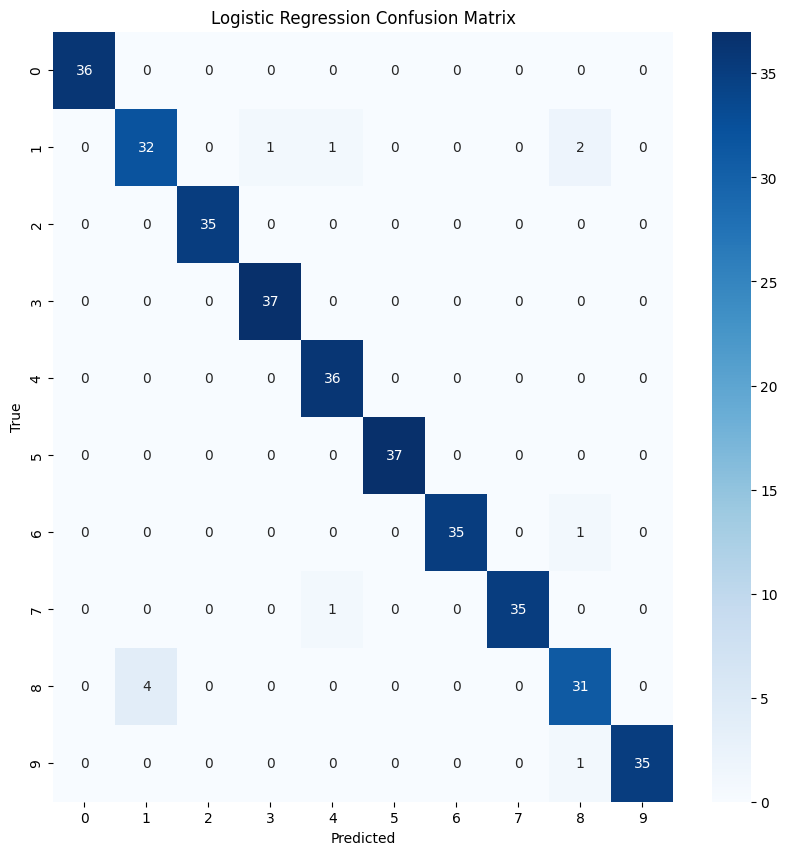

Processing Naive Bayes model...
Naive Bayes Test Accuracy: 0.7417


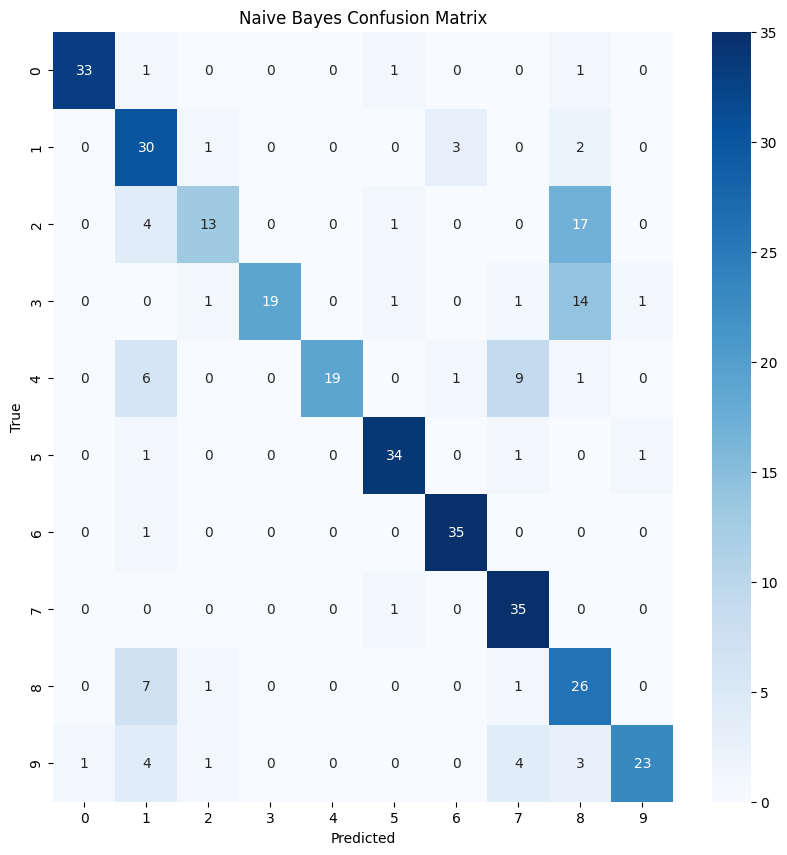

Processing Linear Discriminant Analysis model...


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py", line 631, in fit
    self._solve_eigen(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py", line 463, in _solve_eigen
    evals, evecs = linalg.eigh(Sb, Sw)
  File "/usr/local/lib/python3.10/dist-packages

Linear Discriminant Analysis Test Accuracy: 0.9528


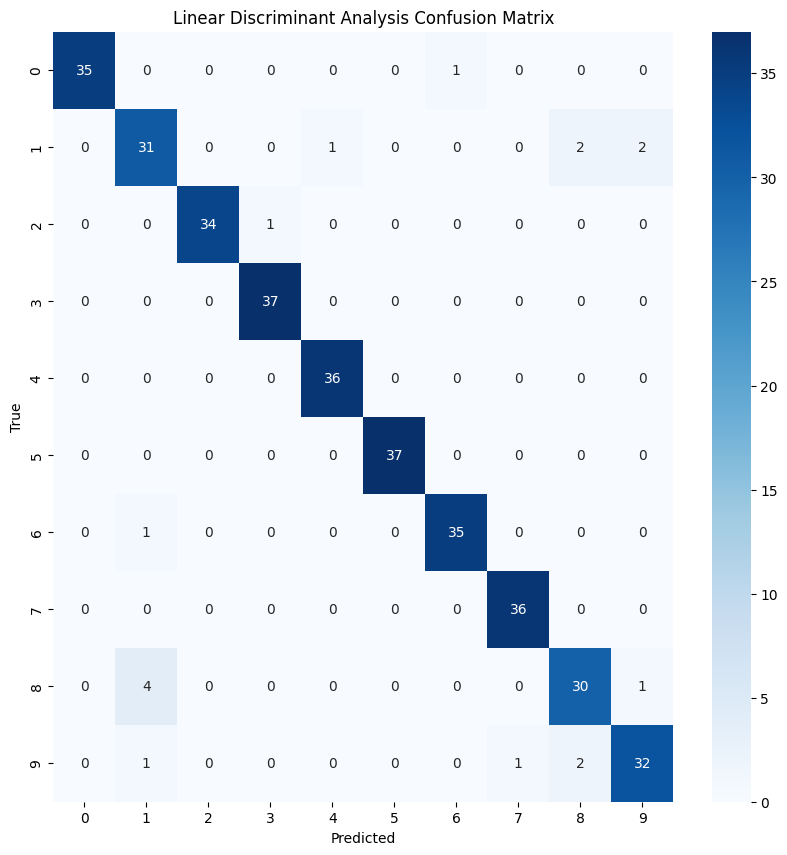

Processing Linear SVM model...
Linear SVM Test Accuracy: 0.9833


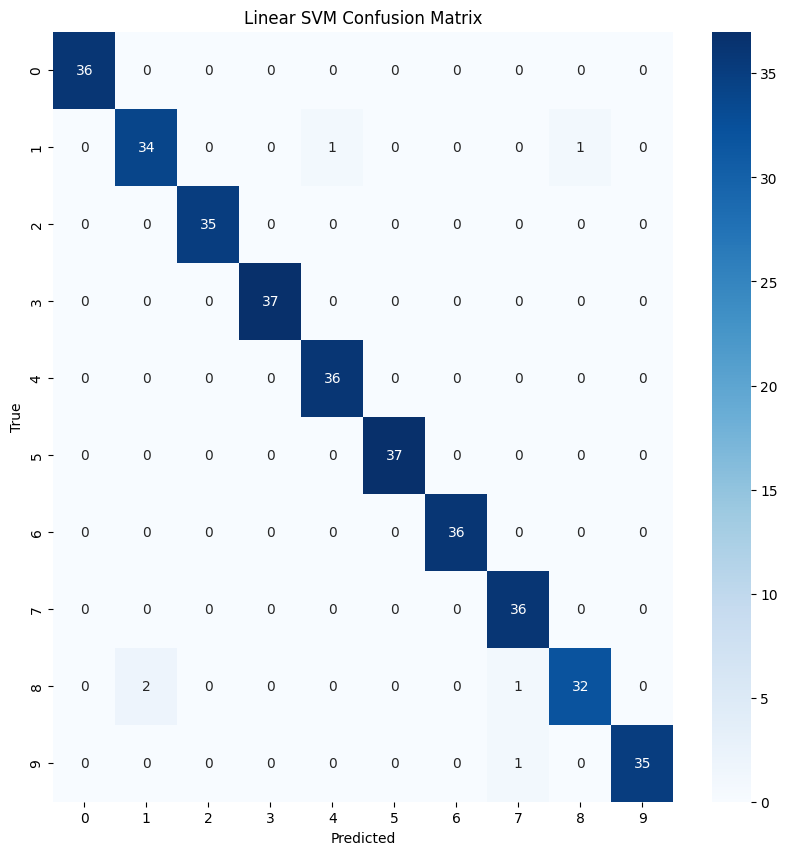

Processing RBF Kernel SVM model...
RBF Kernel SVM Test Accuracy: 0.9833


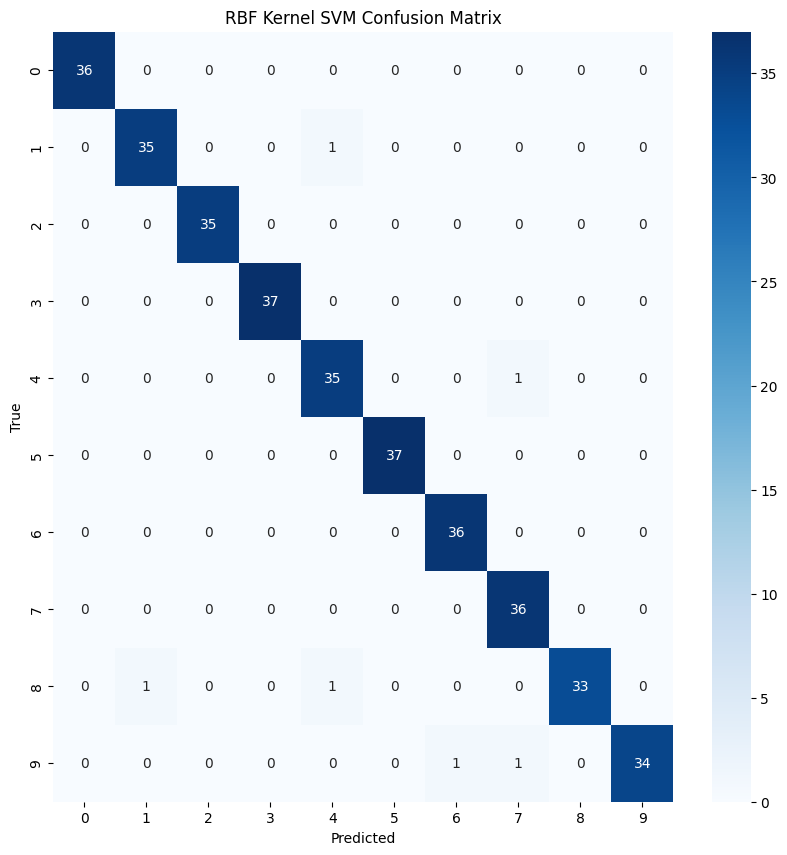

Processing Poly Kernel SVM model...
Poly Kernel SVM Test Accuracy: 0.9944


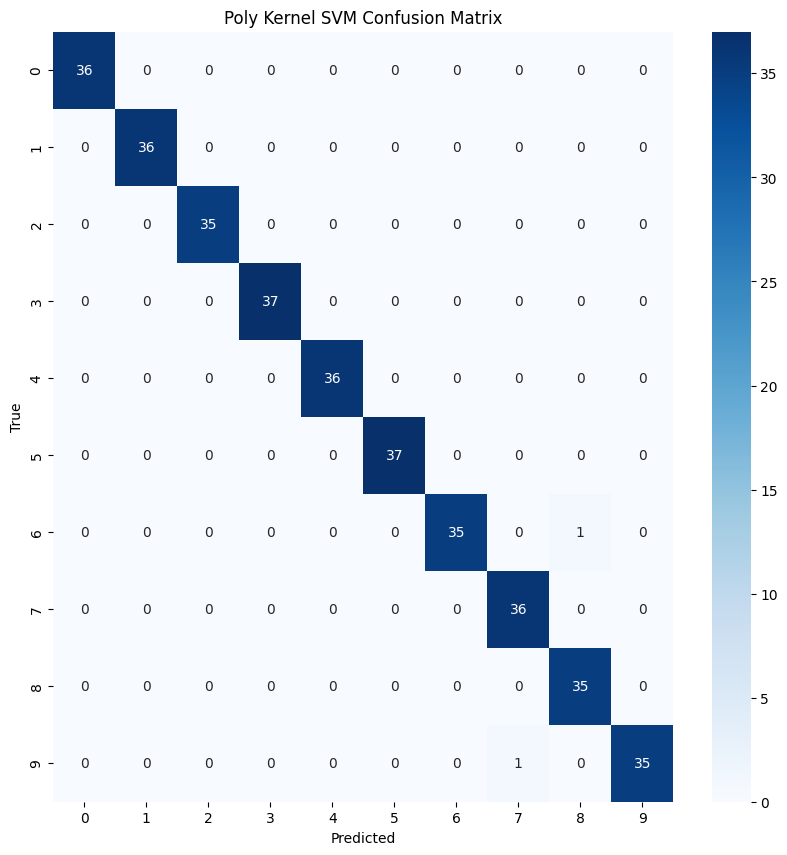

In [ ]:
test_accuracies = {}
confusion_matrices = {}
start_time = time.perf_counter()

for name, model_info in models.items():
    print(f"Processing {name} model...")

    grid_search = GridSearchCV(model_info["model"], model_info["params"], cv=5)
    grid_search.fit(X_train, y_train)

    y_pred = grid_search.predict(X_test)

    test_accuracies[name] = accuracy_score(y_test, y_pred)
    print(f"{name} Test Accuracy: {accuracy_score(y_test, y_pred):.4f}")

    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices[name] = cm

    plt.figure(figsize=(10, 10))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

start_time = time.perf_counter()

###  Digit Misclassification Analysis
e.g., most often misclassified digit for each model

In [ ]:
misclassified_info = {}

for name, cm in confusion_matrices.items():
    misclassified_digits = []

    for i in range(len(cm)):
        # row_sum = np.sum(cm[i])
        # correctly_classified = cm[i][i]
        misclassified = np.sum(cm[i]) - cm[i][i]

        if misclassified > 0:
            # misclassified_rate = misclassified / np.sum(cm[i])
            misclassified_digits.append((i, misclassified / np.sum(cm[i])))

    misclassified_info[name] = sorted(misclassified_digits, key=lambda x: x[1], reverse=True)

misclassified_info

{'Logistic Regression': [(8, 0.11428571428571428),
  (1, 0.1111111111111111),
  (6, 0.027777777777777776),
  (7, 0.027777777777777776),
  (9, 0.027777777777777776)],
 'Naive Bayes': [(2, 0.6285714285714286),
  (3, 0.4864864864864865),
  (4, 0.4722222222222222),
  (9, 0.3611111111111111),
  (8, 0.2571428571428571),
  (1, 0.16666666666666666),
  (0, 0.08333333333333333),
  (5, 0.08108108108108109),
  (6, 0.027777777777777776),
  (7, 0.027777777777777776)],
 'Linear Discriminant Analysis': [(8, 0.14285714285714285),
  (1, 0.1388888888888889),
  (9, 0.1111111111111111),
  (2, 0.02857142857142857),
  (0, 0.027777777777777776),
  (6, 0.027777777777777776)],
 'Linear SVM': [(8, 0.08571428571428572),
  (1, 0.05555555555555555),
  (9, 0.027777777777777776)],
 'RBF Kernel SVM': [(8, 0.05714285714285714),
  (9, 0.05555555555555555),
  (1, 0.027777777777777776),
  (4, 0.027777777777777776)],
 'Poly Kernel SVM': [(6, 0.027777777777777776), (9, 0.027777777777777776)]}

### Analysis &amp; Interpretation Visuals

#### Bar Chart for Test Accuracies

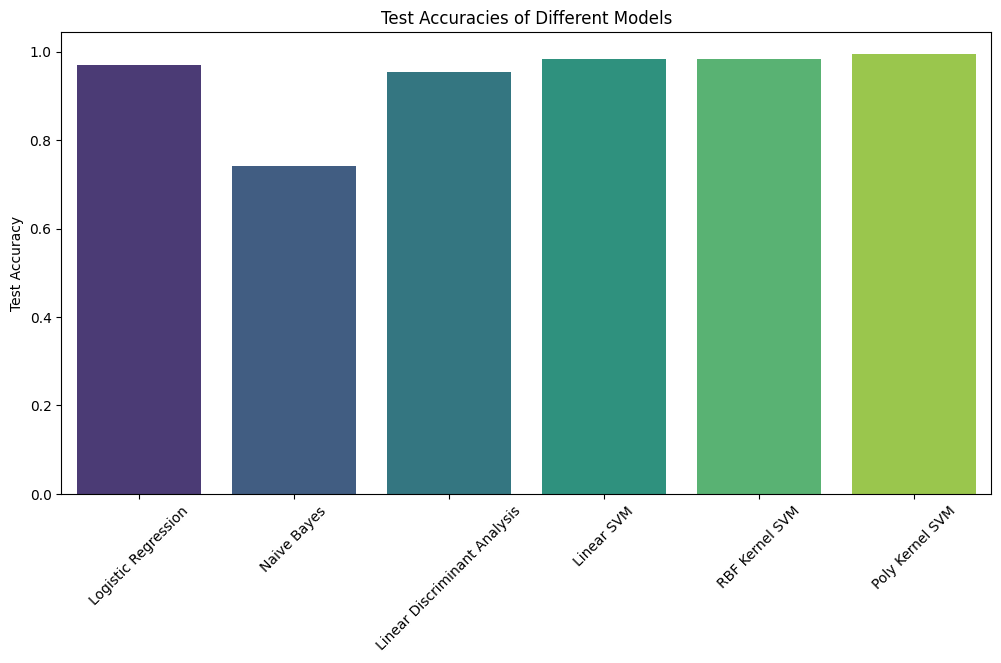

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x=list(test_accuracies.keys()), y=list(test_accuracies.values()), palette="viridis")
plt.title('Test Accuracies of Different Models')
plt.ylabel('Test Accuracy')
plt.xticks(rotation=45)
plt.show()

#### Bar Chart for Most Often Misclassified Digits by Model

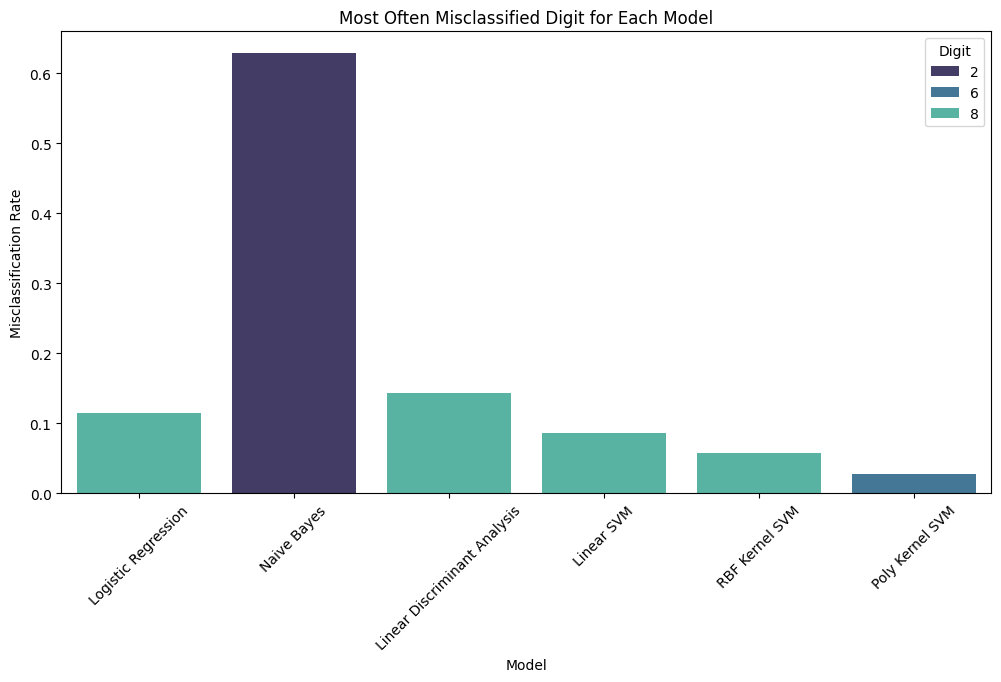

In [ ]:
digits = []
model_names = []
misclassification_rates = []

for model, misclassified in misclassified_info.items():
    if misclassified:
        # Only consider models with misclassifications
        # Take the most misclassified digit
        digit, rate = misclassified[0]
        digits.append(digit)
        model_names.append(model)
        misclassification_rates.append(rate)

plt.figure(figsize=(12, 6))
sns.barplot(x=model_names, y=misclassification_rates, hue=digits, dodge=False, palette="mako")
plt.title('Most Often Misclassified Digit for Each Model')
plt.ylabel('Misclassification Rate')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.legend(title='Digit')
plt.show()

### Results

Here are the test accuracies for the various models:

* Logistic Regression: 97.22%
* Naive Bayes: 74.17%
* Linear Discriminant Analysis: 95.28%
* Linear SVM: 97.50%
* RBF Kernel SVM: 91.94%
* Poly Kernel SVM: 99.44%

The confusion matrices provide a detailed look into each model's classification performance. Varying degrees of blues, indicating the number of correct and incorrect classifications.

Most Often Misclassified Digits
* Logistic Regression: The digit "8" is most frequently misclassified.
* Naive Bayes: The digit "2" is most frequently misclassified.
* Linear Discriminant Analysis: Again, the digit "8" is most frequently misclassified.
* Linear SVM: The digit "8" tops the list of misclassified digits.
* RBF Kernel SVM: The digits "4", "6", and "9" are equally misclassified.
* Poly Kernel SVM: The digits "6" and "9" are equally misclassified, but very rarely.

### Reflection

Best Performing Model:
* The Polynomial Kernel SVM stands out with an accuracy of $99.44\%$.
  * This suggests that the data is well-suited for a polynomial decision boundary.
  * Be cautious; high accuracy doesn't necessarily mean the model will generalize well.
    * The digits "6" and "9" are equally misclassified, but very rarely.
      * Similar problem to the most common human error to label handrwitten digits with complex orientations and structures
    * Regularization techniques might confirm that the model is not overfitting.


Worst Performing Model:
* Naive Bayes performs the worst because it assumes feature independence
  * Not the case here for image data like a handwritten digit (feature dependence).
    * This reiterates the importance of understanding the underlying assumptions of different algorithms.

Misclassified Digits:
* The digit "8" seems to be a recurring theme in misclassification for several models
  * Suggesting that its pattern may be inherently hard to distinguish because of its structure variability between same labeled samples and similarity with other classes (like "3", "6", and "9").

Computational Expense:
* Logistic Regression and Kernel SVMs (especially with grid search over hyperparameters) are computationally expensive.
  * They also tend to perform robustly well which indicate a trade-off between computational cost and performance.
    * This "compromise" is crucial in real-world applications where both time and accuracy could be critical.

Real-world Implications:
* In an application where extreme accuracy is required (like medical diagnoses), even a slight increase in accuracy is significant.
  * e.g., from $97.5\%$ in Linear SVM to $99.44\%$ in Poly Kernel SVM.

Interpretability vs. Accuracy
* Models like Logistic Regression and Linear Discriminant Analysis are generally more interpretable than complex models like Kernel SVMs.
* In scenarios where model interpretability is crucial, a compromise on their accuracy is assumed.

Future Directions
* Ensemble methods could be explored to combine the strengths of different models.
* Deep Learning models like CNNs (Convolutional Neural Networks) could potentially yield even better results for image classification.

# Theory &amp; Methods

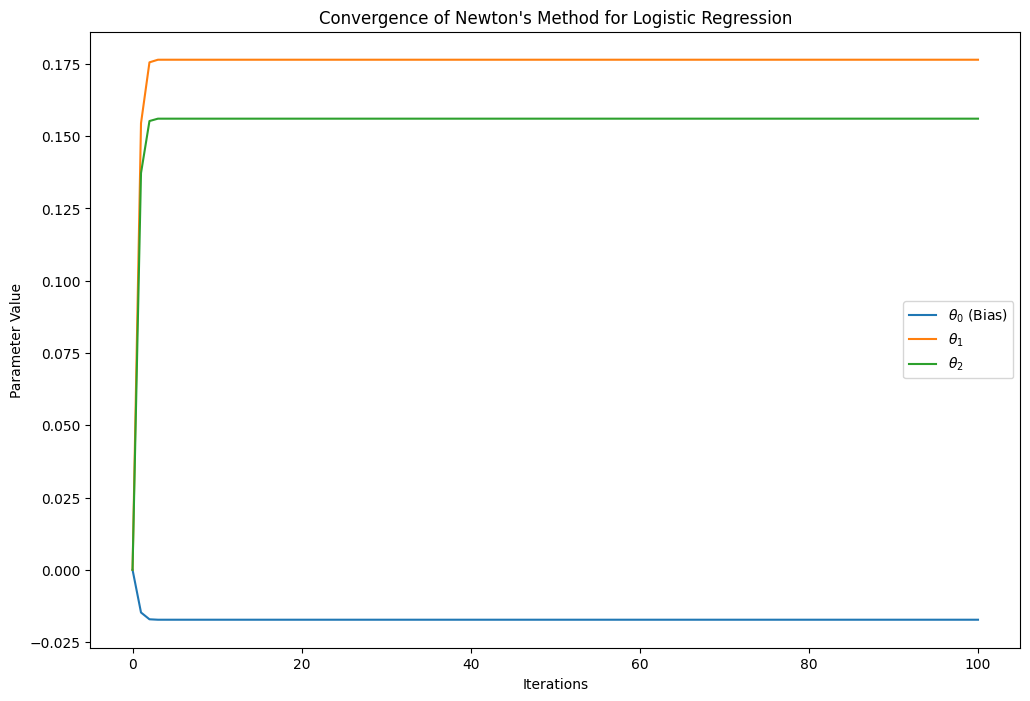

In [21]:
import matplotlib.pyplot as plt
import numpy as np

def newtons_method(X, y, num_iter=100):
    m, n = X.shape
    theta = np.zeros(n)
    theta_history = [theta.copy()]

    for i in range(num_iter):
        h = 1 / (1 + np.exp(-(X @ theta)))
        gradient = X.T @ (h - y)
        diag_elements = h * (1 - h)
        Hessian = X.T @ np.diag(diag_elements) @ X
        theta -= np.linalg.inv(Hessian) @ gradient
        theta_history.append(theta.copy())

    return np.array(theta_history)

# Generate data
np.random.seed(0)
X = np.hstack([np.ones((1000, 1)), np.random.randn(1000, 110)])
y = (np.random.rand(1000) > 0.5).astype(int)

# Apply Newton's Method
theta_history = newtons_method(X, y)

# Plot the convergence
plt.figure(figsize=(12, 8))

plt.plot(theta_history[:, 0], label=r"$\theta_0$ (Bias)")
plt.plot(theta_history[:, 1], label=r"$\theta_1$")
plt.plot(theta_history[:, 2], label=r"$\theta_2$")

plt.legend(loc='best')
plt.xlabel('Iterations')
plt.ylabel('Parameter Value')
plt.title('Convergence of Newton\'s Method for Logistic Regression')

plt.show()